# Titanic - Predictive Modeling on Titanic Dataset

<img title="TITANIC SHIP" alt="Alt text" src="https://mollybrown.org/wp-content/uploads/2020/04/Titanic-Drawing_shutterstock_783936175_resized-1.jpg">


# Importing the Libraries

In [39]:
# import library

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import statistics as st
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

# The meaning of each attribute is the following:

- PassengerId: the ID given to each passenger,
- Survived: the target attribute (1 for passengers who survived, 0 for those who didn't),
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd class),
- Name, Sex, Age.
- SibSp: Number of siblings & spouses aboard the Titanic,
- Parch: Number of parents & children aboard the Titanic,
- Ticket: Ticket number,
- Fare: Passenger fare (in pounds),
- Cabin: Passenger's cabin number, and
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
- 'PassengerId' is unique to each passenge

In [40]:
train = pd.read_csv('/content/titanic_train.csv') 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
test = pd.read_csv("/content/titanic_test.csv")
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
train.shape

(891, 12)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# See the Null Values in the Data. 

In [45]:
# What to look out for during data inspection
#1. Is there a mixture of numeric and none numeric data in the features? YES
# Thats a problem because in data science we need our feeatures to be represented in numerics
#2. Are there cells with missing data in them (nan, NAN) # this suggests that there are missing data in the dataset. This is a probelm
#3. there are 15 features in the data.
# Its not always feasible to count all the features visually because pandas tends to runcate columns display if the number of columns are too many

**STEPS IN DATA CLEANING**
1. inspect data for structure and data types
2. inspect for missing values
3. check for duplicates in data
4. check for outliers
5. miss-labeling and spurious data entries
6. inspect data columns for data types

In [46]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

- We can see there are only 3 columns that have Null values.

filling the null column with its mean

In [47]:
#filling the null column for age with its mean
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Age'] 

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

# Statistical Summary of the Data. 

In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


- There is a column named as Survived which have 0 or 1 values, So 0 for those who didn't survived and 1 for those who servived.

# Let's see the Survived Column 

In [50]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

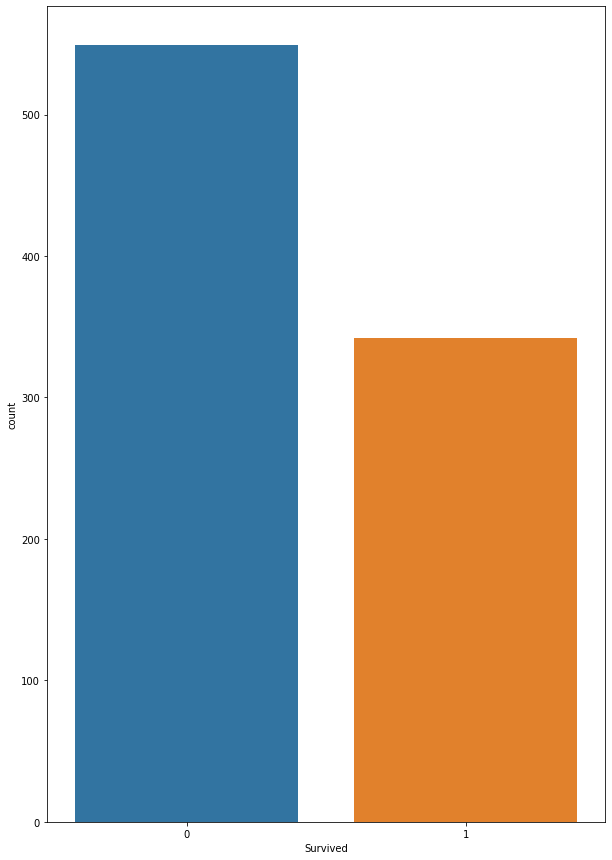

In [51]:
sns.countplot(train['Survived'], data = train) 

The rate of survival is less

# We want to know male and female that Survived.  

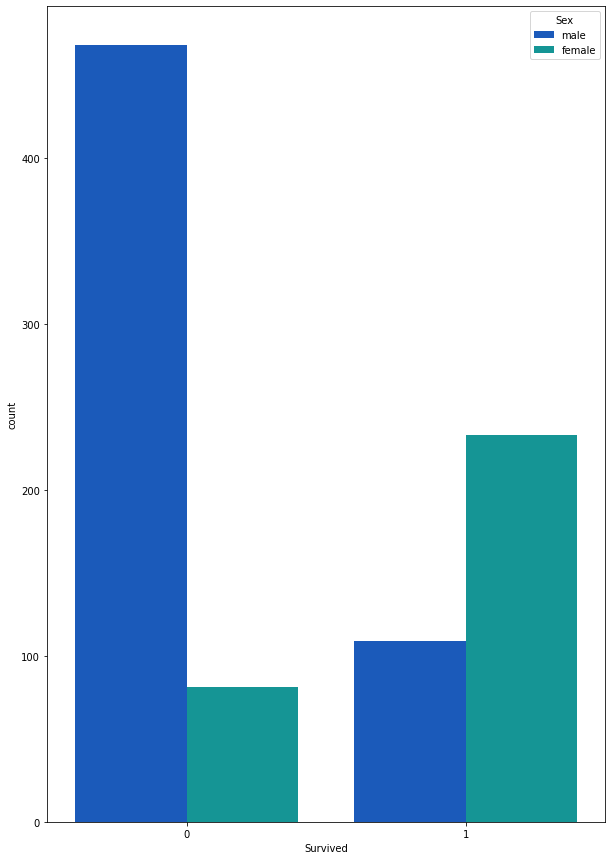

In [52]:
sns.countplot(train['Survived'], hue = 'Sex', data = train, palette = 'winter');

In [53]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [54]:
women = train.loc[train.Sex == 'female']["Survived"] 
rate_women = sum(women)/len(women)
print("women who survived:", round(rate_women,4)*100 , "%")   

women who survived: 74.2 %


In [55]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", round(rate_men,2)*100 , "%")

% of men who survived: 19.0 %


- More Female survived in the incident. 

# Age Column 

In [56]:
train['Age'].isnull().sum() # There are no null values in the Column. 

0

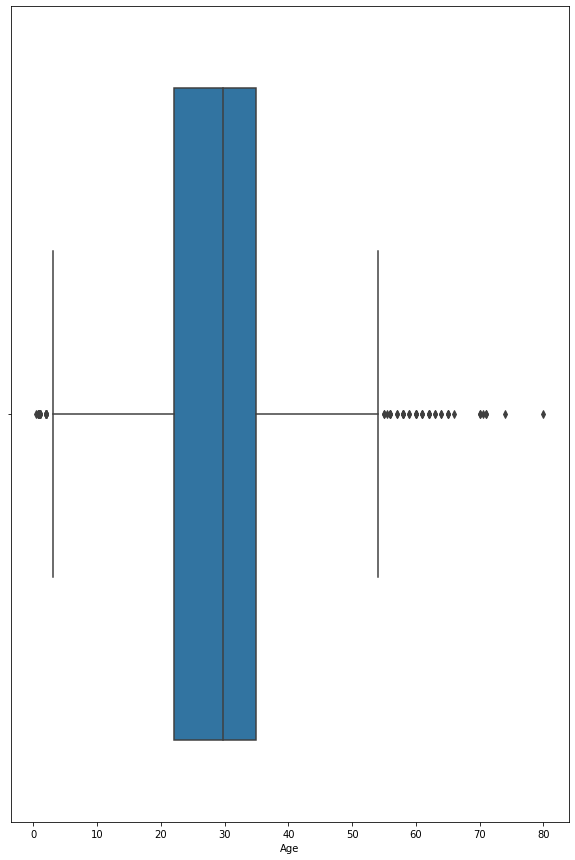

In [57]:
sns.boxplot(train.Age)

In [58]:
ageOutliers = train.loc[train['Age']>65]
ageOutliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


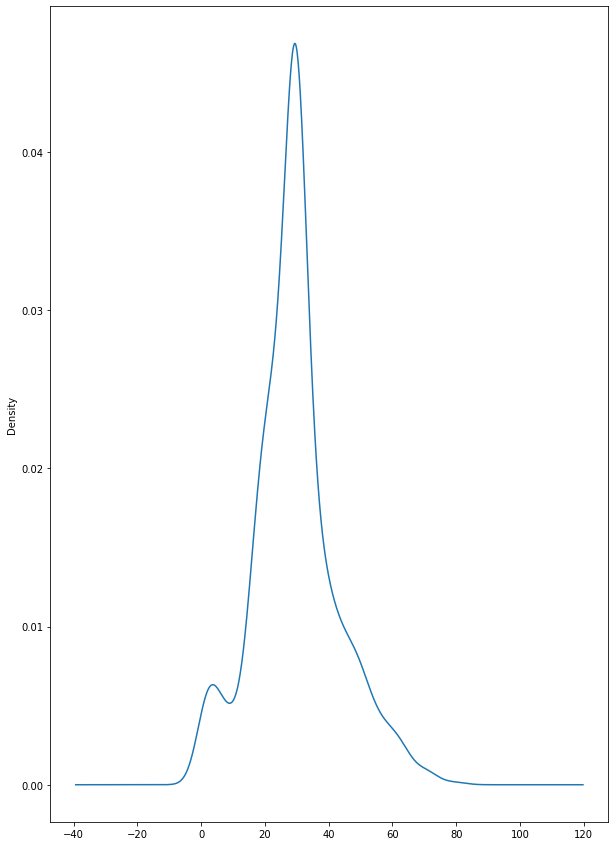

In [59]:
train.Age.plot(kind='density')

We can see from the statistical summary that minimum value in *Fare* is 0.00. Which is not possible  .

In [60]:
fareOutliers = train.loc[train['Fare']>70]
fareOutliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000,0,0,113572,80.0000,B28,NaN
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.000000,1,1,PC 17756,83.1583,E49,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S


In [61]:
train['Fare'] = train['Fare'].replace(0, train['Fare'].mean())  
train['Fare'].min()

4.0125

In [62]:
train.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

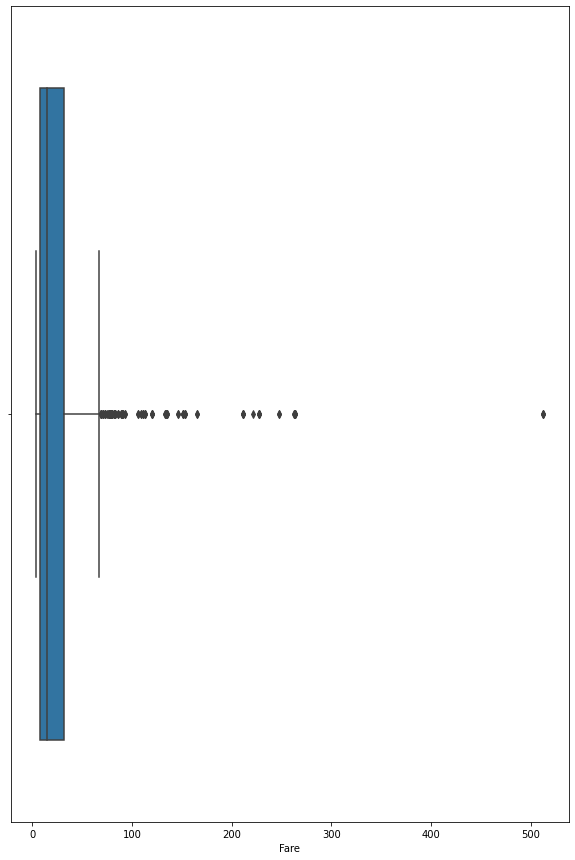

In [63]:
sns.boxplot(train.Fare)

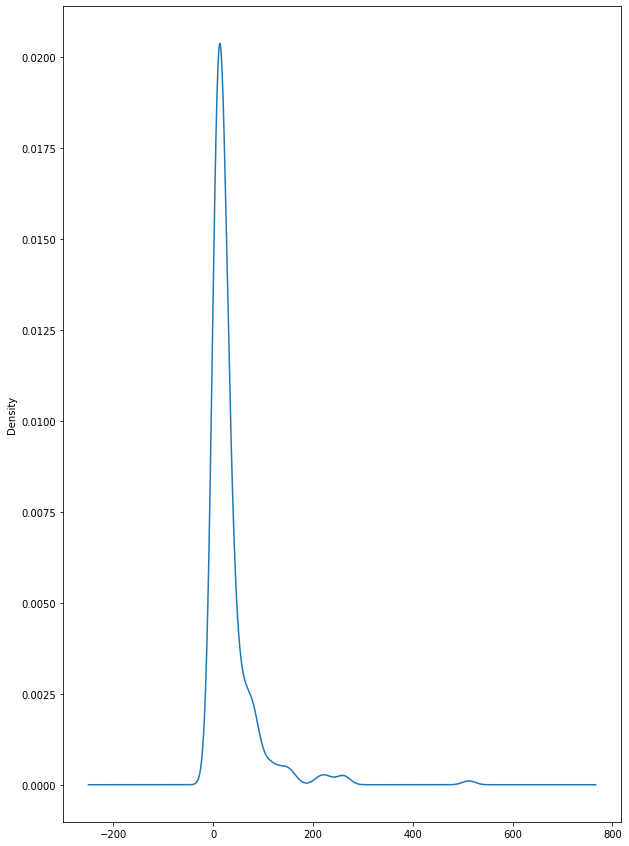

In [64]:
train.Fare.plot(kind='density')

## Embarked

In [65]:
train['Embarked'].replace('nan',np.nan,inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True) 

train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
# We would have to convert also these values to the Numerical Data.

train['Embarked']=train['Embarked'].map({'S':0,'C':1,'Q':2}) 

In [67]:
train['Embarked'].unique() 

array([0, 1, 2])

In [68]:
train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

## Sex

In [69]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [70]:
# Change these values in the Numeric Format. 

train['Sex']=train['Sex'].map({'male':0,'female':1})
train['Sex'] 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [71]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [72]:
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

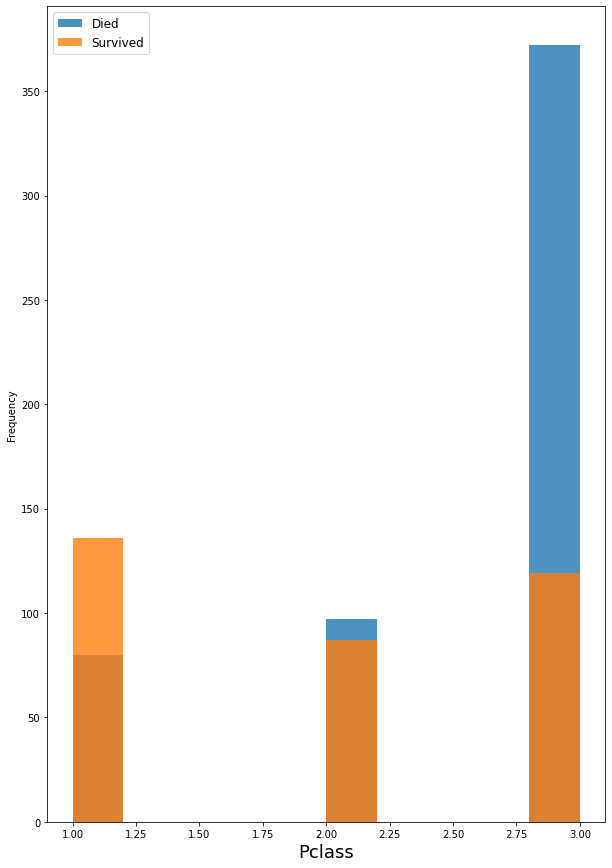

In [73]:
#plt.rc('xtick', labelsize=14) 
#plt.rc('ytick', labelsize=14)

plt.figure()
fig = train.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8) 
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

- We can see that 1st Class ticket holders survived more compared to 2nd and 3rd Class ticket holders.  

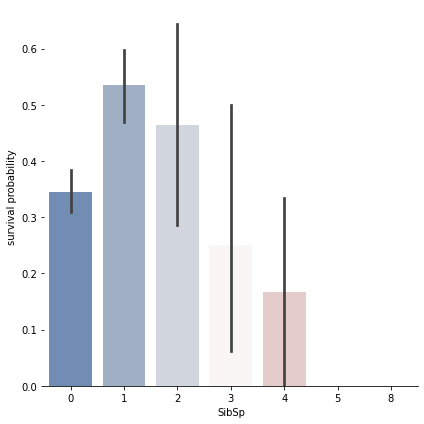

In [74]:
g = sns.catplot(x="SibSp",y="Survived",data=train,kind="bar", height = 6, palette="vlag" )
g.despine(left=True)
g = g.set_ylabels("survival probability")

- Single passengers (0 SibSP) or passengers having 1-2 relatives on board (SibSP 1 or 2) have more chance to survive while it seems that passengers having a lot of siblings/spouses have less chance to survive.

- NOTE: There is an important standard deviation in the survival of passengers with 3 parents/children

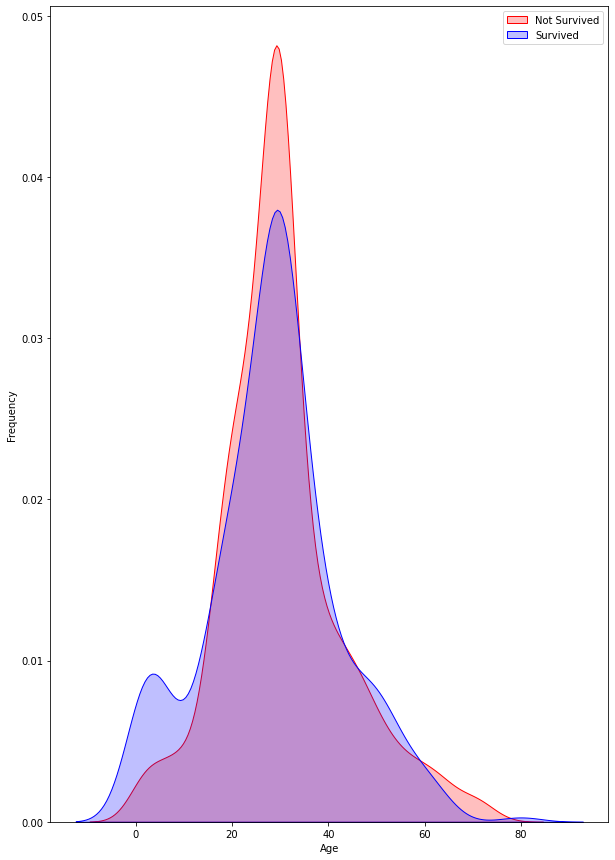

In [75]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"])], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"])], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

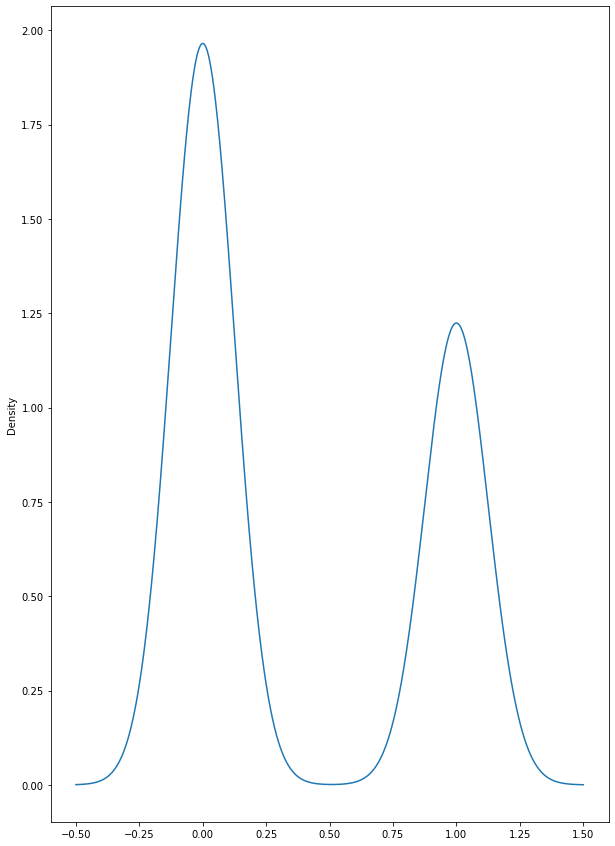

In [76]:
train.Survived.plot(kind='density')

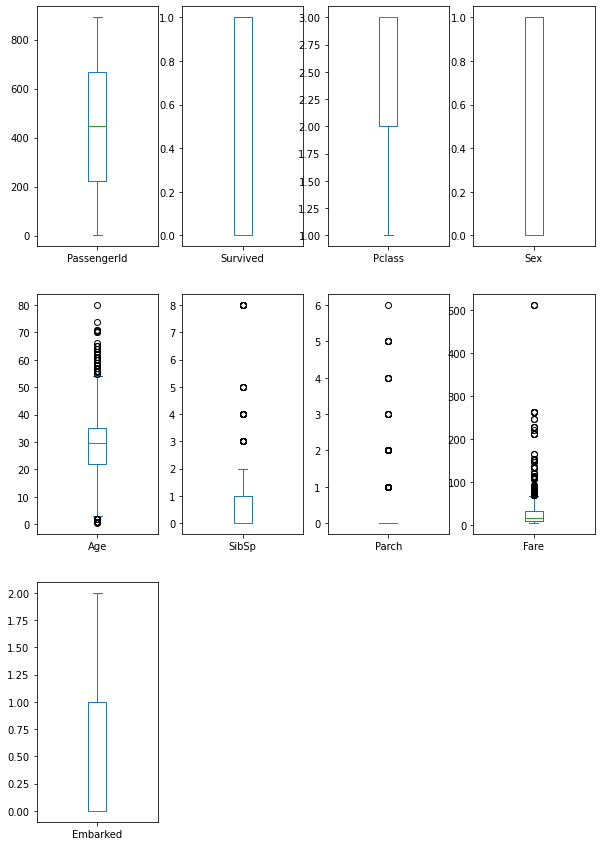

In [77]:
train.plot(kind='box', subplots=True,layout=(3,4), sharex=False, sharey=False)
plt.rcParams["figure.figsize"] = (10,15)
plt.show()

# Machine Learning Model

In [78]:
X = train.drop('Survived',axis=1)
y = train.Survived

In [79]:
#train_test_splitting of the dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Logistic Regression

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train) #fit model to the dataset
y_pred = log_reg.predict(X_test) #to predict

- [Receiver Operating Characteristic Curve](https://www.sciencedirect.com/science/article/pii/S1556086415306043) (roc_auc_score) of above 0.5 is acceptable.
- [F1 score](https://stephenallwright.com/good-f1-score/) ranges from 0 to 1, where 0 is the worst possible score and 1 is a perfect score indicating that the model predicts each observation correctly.
- [Accuracy](https://stephenallwright.com/good-accuracy-score/)
    - Over 90% - Very good.
    - Between 70% and 90% - Good.
    - Between 60% and 70% - OK.
    - Below 60% - Poor.

In [81]:
# to test the performance of our model
print('ROC Score:{:.2f}'.format(roc_auc_score(y_test,y_pred)))
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Accuracy:{:.2f}'.format(f1_score(y_test,y_pred)))

ROC Score:0.76
Accuracy:0.78
Accuracy:0.70


In [82]:
#hyperparameter tuning of logistic regression

from sklearn.model_selection import GridSearchCV
parameters = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(log_reg,parameters,cv=5,n_jobs=-1)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [83]:
#best_parameters
print("Best CV params", cv.best_params_) 

Best CV params {'C': 100, 'penalty': 'l2'}


In [84]:
#best_score
print("Best CV score", cv.best_score_)

Best CV score 0.8054314891706879


In [85]:
y_pred = cv.predict(X_test)

In [86]:
# to test the performance of our model
print('ROC Score:{:.2f}'.format(roc_auc_score(y_test,y_pred)))
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Accuracy:{:.2f}'.format(f1_score(y_test,y_pred)))

ROC Score:0.77
Accuracy:0.79
Accuracy:0.71


# Let's Work on Test Data

In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
test.shape

(418, 11)

In [90]:
test.isnull().sum().sort_values(ascending=False)[:4]

Cabin          327
Age             86
Fare             1
PassengerId      0
dtype: int64

## Cleaning the test data

In [91]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Age'].isnull().sum()

0

In [92]:
test['Fare'] = test['Fare'].replace(0, test['Fare'].mean())  
test['Fare'].isnull().sum() 

1

A column contains null value

In [93]:
test[test['Fare'].isnull()] # for confirmation

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [94]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Fare'].isnull().sum()

0

In [95]:
# Change these values in the Numeric Format. 

test['Sex']=test['Sex'].map({'male':0,'female':1})
test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [96]:
# We would have to convert also these values to the Numerical Data.

test['Embarked']=test['Embarked'].map({'S':0,'C':1,'Q':2})
test['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

## Drop irrelevant columns

In [97]:
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [98]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [99]:
cv.predict(test) 

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Thank you